In [1]:
import scipy.io
from SimPEG import *

Efficiency Warning: Interpolation will be slow, use setup.py!

            python setup.py build_ext --inplace
    


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16, 'text.usetex': True})

In [6]:
directory = "C:\\Users\\dominiquef.MIRAGEOSCIENCE\\Dropbox\\TKCpaper\\Models"
#directory = "C:\\Users\\dominiquef.MIRAGEOSCIENCE\\Google Drive\\Tli_Kwi_Cho\\Modelling\\Inversion\\EM\\VTEM\\3D\\Parametric"
#mesh = Mesh.TensorMesh.readUBC(directory + "\\UBC_mesh_small_v3.msh")

lake = np.loadtxt(directory+'Lake_trace.dat')
outfile = "\\Cond_DIGHEM3D.png"

#directory = "C:\\Users\\dominiquef.MIRAGEOSCIENCE\\Google Drive\\Tli_Kwi_Cho\\Modelling\\Inversion\\EM\\DIGHEM\\3D\\Real_topo\\Inv9_FixBeta_1DRef"
mesh = Mesh.TensorMesh.readUBC(directory + "TKC_common_mesh.mesh")
cond_m1 = mesh.readModelUBC(directory + 'sigma_DIGHEM_3D.con')
cond_m2 = None



airind = cond_m1==1e-8
active = ~airind.copy()



DOI = np.ones(mesh.nC)
if cond_m2 is not None:
    DOI = np.abs(np.log10(cond_m1) - np.log10(cond_m2)) / np.abs(np.log10(2e-4) - np.log10(5e-4))
    # Normalize between [0 1]
    DOI = DOI - np.min(DOI)
    DOI = (1.- DOI/np.max(DOI))**2.
    #DOI[DOI > 0.2] = 1 
    
DOI[airind] = 0
DOI = DOI.reshape(mesh.vnC, order='F')
    






IOError: [Errno 2] No such file or directory: 'C:\\Users\\dominiquef.MIRAGEOSCIENCE\\Dropbox\\TKCpaper\\ModelsLake_trace.dat'

In [ ]:
import matplotlib.gridspec as gridspec

def vizCond(val1, DOI = None, levels=None, indz = 0, indy1 = 0, indy2 = 0, vmin=-4, vmax=-1,savefig=False, figname="Conductivity.png"):
    #indz = 13
    #indy1 = 54
    #indy2 = int(np.argmin(abs(mesh.vectorCCy - 7.13359000e+06)))

    #print mesh.vectorCCz[indz]
    #print mesh.vectorCCy[indy2]
    #print mesh.vectorCCy[indy1]    
    #print vmin, vmax
    
    # xlim 556800 to 557800
# ylim 7133200 to 7134700
    airind = val1==1e-8
    xmin, xmax = 556800, 557800
    ymin, ymax = 7133200, 7134700 
    zmin, zmax = -100, 500
    surface = 418.
    temp = np.log10(val1)
    temp[temp<vmin] = vmin
    temp[temp>vmax] = vmax
    temp[airind] = np.nan
    temp = temp.reshape(mesh.vnC, order='F')
    X, Z = mesh.gridCC[:,0].reshape(mesh.vnC, order="F"), mesh.gridCC[:,2].reshape(mesh.vnC, order="F")    
    Y = mesh.gridCC[:,1].reshape(mesh.vnC, order="F")
    
    #global ax1, ax2, ax3, fig
    gs = gridspec.GridSpec(1,18)
    fig = plt.figure(figsize = (15, 7))
    ax1 = plt.subplot(gs[:5])
    
    ptemp = temp[:,:,indz].T
    ptemp = ma.array(ptemp ,mask=np.isnan(ptemp))
    #dat1 = mesh.plotSlice(temp, normal='Z', ind=indz, ax=ax1, grid=True, gridOpts={'alpha':0.0, 'color':'w'}, clim=(vmin, vmax))
    plt.contourf(X[:,:,indz].T,Y[:,:,indz].T,ptemp,20,vmin=vmin, vmax=vmax, clim=[vmin,vmax])
        
    ax2 = plt.subplot(gs[6:11])
    ptemp = temp[:,indy1,:].T

    dat2 = plt.contourf(X[:,indy1,:].T,Z[:,indy1,:].T,ptemp,20,vmin=vmin, vmax=vmax,clim=[vmin,vmax])
    plt.draw()
    
    if DOI is not None:      
        DOI_sub = (DOI[:,indy1,:])        
        cax = dat2.get_facecolors()
        cax[:,3] = mkvc(DOI_sub)
        dat2.set_facecolor(cax)
        plt.draw()
        
    ax3 = plt.subplot(gs[12:17])
    ptemp = temp[:,indy2,:].T
    
    dat3 = plt.contourf(X[:,indy2,:].T,Z[:,indy2,:].T,ptemp,20,vmin=vmin, vmax=vmax, clim=[vmin,vmax])    
    plt.draw()
    
    if DOI is not None:      
        DOI_sub = (DOI[:,indy2,:])      
        cax = dat3.get_facecolors()
        cax[:,3] = mkvc(DOI_sub)
        dat3.set_facecolor(cax)
        plt.draw()
        
    #dat2 = mesh.plotSlice(temp, normal='Y', ind=indy1, ax=ax2, grid=True, gridOpts={'alpha':0.0, 'color':'w'}, clim=(vmin, vmax))
    #dat3 = mesh.plotSlice(temp, normal='Y', ind=indy2, ax=ax3, grid=True, gridOpts={'alpha':0.0, 'color':'w'}, clim=(vmin, vmax))
    #cb1 = plt.colorbar(dat1[0], orientation="horizontal", ax = ax2, ticks=np.linspace(vmin, vmax, 4), format="$10^{%.1f}$")
    #cb2 = plt.colorbar(dat1[0], orientation="horizontal", ax = ax3, ticks=np.linspace(vmin, vmax, 4), format="$10^{%.1f}$")
    #cb1.set_label("Conductivity (S/m)")
    #cb2.set_label("Conductivity (S/m)")

    
    ax1.plot(lake[:,0], lake[:,1], 'k.', ms=2)    
    ax1.plot(np.linspace(xmin-500, xmax+500, 101), np.ones(101)*mesh.vectorCCy[indy1], 'w-', lw = 1)
    ax1.text(xmin+100., mesh.vectorCCy[indy1], 'B',fontsize =20, color="w")
    ax1.text(xmax-100, mesh.vectorCCy[indy1], ("B'") ,fontsize =20, color="w")
    ax1.plot(np.linspace(xmin-500, xmax+500, 101), np.ones(101)*mesh.vectorCCy[indy2], 'w-', lw = 1)
    ax1.text(xmin+100., mesh.vectorCCy[indy2], 'A',fontsize =20, color="w")
    ax1.text(xmax-100, mesh.vectorCCy[indy2], ("A'") ,fontsize =20, color="w")

    #ax2.text(xmin, mesh.vectorCCz[indz], 'A',fontsize =20, color="w")
    #ax2.text(xmax-100., mesh.vectorCCz[indz], ("A'") ,fontsize =20, color="w")
    #ax3.text(xmin, mesh.vectorCCz[indz], 'B',fontsize =20, color="w")
    #ax3.text(xmax-100., mesh.vectorCCz[indz], ("B'") ,fontsize =20, color="w")
    #ax3.set_yticks([])
    ax1.set_title('Elevation (m):   ' + str(int(mesh.vectorCCz[indz]))+' m',size=16)
    ax1.set_xlabel('Easting (m)',size=14)
    ax1.set_ylabel('Northing (m)',size=14)

#     ax2.text(xmin, mesh.vectorCCz[indz], "A", fontsize = 20, color="w")
#     ax2.plot(xmin,mesh.vectorCCz[indz],"wv", markersize = 15)
#     ax2.text(xmin+50, mesh.vectorCCz[indz], "Z: " + str(int(mesh.vectorCCz[indz])) + " m" , fontsize = 12, color="w")
#     ax2.plot(np.r_[xmin, xmax], np.r_[mesh.vectorCCz[indz], mesh.vectorCCz[indz]] ,'w--', lw=1)
    ax2.set_xlabel('Easting (m)',size=14)
    ax2.set_ylabel('Elevation (m)',size=14)
    ax2.set_title("DO-27 B-B'")
    

#     ax3.text(xmin, mesh.vectorCCz[indz], "B", fontsize = 20, color="w")
#     ax3.text(xmax-100, mesh.vectorCCz[indz], "B'", fontsize = 20, color="w")
#     ax3.plot(np.r_[xmin, xmax], np.r_[mesh.vectorCCz[indz], mesh.vectorCCz[indz]] ,'w--', lw=1)
    ax3.set_xlabel('Easting (m)',size=14)
    ax3.set_ylabel('Elevation (m)',size=14)
    ax3.set_title("DO-18 A-A'")
    
    x = np.linspace(xmin*1.0001, xmax*0.9999, 3)
    ax1.set_xticks(map(int, x))
    ax1.set_xticklabels(map(str, map(int, x)),size=12)
    ax2.set_xticks(map(int, x))
    ax2.set_xticklabels(map(str, map(int, x)),size=12)
    ax3.set_xticks(map(int, x))
    ax3.set_xticklabels(map(str, map(int, x)),size=12)

    y = np.linspace(ymin*1.000025, ymax*.999975, 3)
    ax1.set_yticks(map(int, y))
    ax1.set_yticklabels(map(str, map(int, y)),size=12,rotation='vertical')
    
#     y = np.linspace(zmin, zmax, 3)
    y = np.asarray([-100,200,mesh.vectorCCz[indz],500])
    ax2.set_yticks(map(int, y))
    ax2.set_yticklabels(map(str, map(int, y)),size=12,rotation='vertical')
    ax3.set_yticks(map(int, y))
    ax3.set_yticklabels(map(str, map(int, y)),size=12,rotation='vertical')
    ax2.axis("equal")
    ax3.axis("equal")
    ax1.axis("equal")
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    ax2.set_xlim(xmin, xmax)
    ax2.set_ylim(zmin,zmax)
    ax3.set_xlim(xmin, xmax)
    ax3.set_ylim(zmin,zmax)
    
    pos =  ax2.get_position() 
    ax2.set_position([pos.x0 + 0.01, pos.y0+0.1,  pos.width, pos.height*.35])
    ax3.set_position([pos.x0 + 0.01, pos.y0+.5,  pos.width, pos.height*.35])
    
    cbarax = fig.add_axes([pos.x0 + 0.01, pos.y0,  pos.width, pos.height*0.025])  ## the parameters are the specified position you set 
    # Add a blank plot to generate the colorbar
    dat1 = ax3.scatter(np.linspace(vmin, vmax, 4),np.linspace(vmin, vmax, 4),c=np.linspace(vmin, vmax, 4),vmin=vmin, vmax=vmax)

    cb = plt.colorbar(dat1,cax=cbarax, orientation="horizontal", ax = ax2, ticks=np.linspace(vmin, vmax, 3), format="$10^{%.1f}$")
    cb.set_label("Conductivity (S/m)",size=12)
    
    if levels is not None:
        
        TEMP = val1.reshape(mesh.vnC, order="F")    
        X, Z = mesh.gridCC[:,0].reshape(mesh.vnC, order="F"), mesh.gridCC[:,2].reshape(mesh.vnC, order="F")    
        Y = mesh.gridCC[:,1].reshape(mesh.vnC, order="F")

        cs = ax1.contour(X[:,:,indz], Y[:,:,indz], TEMP[:,:,indz], levels=levels,colors="k",linewidths = (1,),linestyles='dashed')
        cs = ax2.contour(X[:,indy1,:], Z[:,indy1,:], TEMP[:,indy1,:], levels=levels,colors="k",linewidths = (1,),linestyles='dashed')
        cs = ax3.contour(X[:,indy2,:], Z[:,indy2,:], TEMP[:,indy2,:], levels=levels,colors="k",linewidths = (1,),linestyles='dashed')


    
    #     ax1.text(x1+80., y1-100, 'A3', color='w', fontsize=16)
#     ax1.text(x2+100., y2-50., 'A2', color= 'w', fontsize=16)
#     ax1.text(x3+200, y3, 'A1', color= 'w', fontsize=16)        
#     ax2.text(x3+100, z3-150, 'A1', color= 'w', fontsize=16)        
#     ax3.text(x1-200, z1-150, 'A3', color= 'w', fontsize=16)            
#     ax3.text(x2+100, z2-50, 'A2', color= 'w', fontsize=16) 
    
    if savefig:
        fig.savefig(figname)

    
    

In [5]:
vizCond(cond_m1, None, levels=[1e-3], indz = 13, indy1 = 20, indy2 = 51, vmin = -5.0, vmax = -1.0, savefig=True, figname = directory + outfile)


NameError: name 'vizCond' is not defined

In [94]:
import matplotlib.gridspec as gridspec

def vizCond(val1, DOI = None, levels=None, indz = 0, indy1 = 0, vmin=-4, vmax=-1,savefig=False, figname="Conductivity.png"):
    #indz = 13
    #indy1 = 54
    #indy2 = int(np.argmin(abs(mesh.vectorCCy - 7.13359000e+06)))

    #print mesh.vectorCCz[indz]
    #print mesh.vectorCCy[indy2]
    #print mesh.vectorCCy[indy1]    
    #print vmin, vmax
    
    # xlim 556800 to 557800
# ylim 7133200 to 7134700
    xmin, xmax = 556800, 557800
    ymin, ymax = 7133200, 7134200 
    zmin, zmax = -100, 500
    surface = 418.
    X, Z = mesh.gridCC[:,0].reshape(mesh.vnC, order="F"), mesh.gridCC[:,2].reshape(mesh.vnC, order="F")    
    Y = mesh.gridCC[:,1].reshape(mesh.vnC, order="F")
    temp = np.log10(val1)
    temp[temp<vmin] = vmin
    temp[temp>vmax] = vmax
    temp[~active] = np.nan
    temp = temp.reshape(mesh.vnC, order='F')
    
    #global ax1, ax2, ax3, fig
    gs = gridspec.GridSpec(1,2)
    fig = plt.figure(figsize = (15, 8))
    ax1 = plt.subplot(gs[0])
    
    ptemp = temp[:,:,indz].T
    ptemp = ma.array(ptemp ,mask=np.isnan(ptemp))
    #dat1 = mesh.plotSlice(temp, normal='Z', ind=indz, ax=ax1, grid=True, gridOpts={'alpha':0.0, 'color':'w'}, clim=(vmin, vmax))
    dat1 = plt.contourf(X[:,:,indz].T,Y[:,:,indz].T,ptemp,20,vmin=vmin, vmax=vmax)
        
    ax2 = plt.subplot(gs[1])
    ptemp = temp[:,indy1,:].T

    dat2 = plt.contourf(X[:,indy1,:].T,Z[:,indy1,:].T,ptemp,20,vmin=vmin, vmax=vmax,edgecolor="none")
    plt.draw()
    if DOI is not None:      
        DOI_sub = (DOI[:,indy1,:])        
        cax = dat2.get_facecolors()
        cax[:,3] = mkvc(DOI_sub)
        dat2.set_facecolor(cax)
        plt.draw()
        
        
    #dat2 = mesh.plotSlice(temp, normal='Y', ind=indy1, ax=ax2, grid=True, gridOpts={'alpha':0.0, 'color':'w'}, clim=(vmin, vmax))
    #dat3 = mesh.plotSlice(temp, normal='Y', ind=indy2, ax=ax3, grid=True, gridOpts={'alpha':0.0, 'color':'w'}, clim=(vmin, vmax))
    #cb1 = plt.colorbar(dat1[0], orientation="horizontal", ax = ax2, ticks=np.linspace(vmin, vmax, 4), format="$10^{%.1f}$")
    #cb2 = plt.colorbar(dat1[0], orientation="horizontal", ax = ax3, ticks=np.linspace(vmin, vmax, 4), format="$10^{%.1f}$")
    #cb1.set_label("Conductivity (S/m)")
    #cb2.set_label("Conductivity (S/m)")

    
    ax1.plot(lake[:,0], lake[:,1], 'k.', ms=4)    
    ax1.plot(np.linspace(xmin-500, xmax+500, 101), np.ones(101)*mesh.vectorCCy[indy1], 'w-', lw = 1)
    ax1.text(xmin+50., mesh.vectorCCy[indy1], 'B',fontsize =20, color="w")
    ax1.text(xmax-50, mesh.vectorCCy[indy1], ("B'") ,fontsize =20, color="w")


    #ax2.text(xmin, mesh.vectorCCz[indz], 'A',fontsize =20, color="w")
    #ax2.text(xmax-100., mesh.vectorCCz[indz], ("A'") ,fontsize =20, color="w")
    #ax3.text(xmin, mesh.vectorCCz[indz], 'B',fontsize =20, color="w")
    #ax3.text(xmax-100., mesh.vectorCCz[indz], ("B'") ,fontsize =20, color="w")
    #ax3.set_yticks([])
    ax1.set_title('Elevation (m):   ' + str(int(mesh.vectorCCz[indz]))+' m',size=16)
    ax1.set_xlabel('Easting (m)',size=14)
    ax1.set_ylabel('Northing (m)',size=14)

    ax2.plot(np.r_[xmin, xmax], np.r_[mesh.vectorCCz[indz], mesh.vectorCCz[indz]] ,'w--', lw=1)
    ax2.set_xlabel('Easting (m)',size=14)
    ax2.set_ylabel('Elevation (m)',size=14)
    ax2.set_title("DO-27 B-B'")
    
#     ax2.text(xmin, mesh.vectorCCz[indz], "A", fontsize = 20, color="w")
#     ax2.text(xmax-100, mesh.vectorCCz[indz], "A'", fontsize = 20, color="w")
    ax2.plot(np.r_[xmin, xmax], np.r_[mesh.vectorCCz[indz], mesh.vectorCCz[indz]] ,'w--', lw=1)
    
    x = np.linspace(xmin*1.0001, xmax*0.9999, 3)
    ax1.set_xticks(map(int, x))
    ax1.set_xticklabels(map(str, map(int, x)),size=12)
    ax2.set_xticks(map(int, x))
    ax2.set_xticklabels(map(str, map(int, x)),size=12)

    y = np.linspace(ymin + 20., ymax-20, 3)
    ax1.set_yticks(map(int, y))
    ax1.set_yticklabels(map(str, map(int, y)),size=12,rotation='vertical')
    
    y = np.asarray([-100,200,mesh.vectorCCz[indz],500])
    ax2.set_yticks(map(int, y))
    ax2.set_yticklabels(map(str, map(int, y)),size=12,rotation='vertical')
    ax2.axis("equal")

    ax1.axis("equal")
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    ax2.set_xlim(xmin, xmax)
    ax2.set_ylim(zmin,zmax)
    
    pos =  ax2.get_position() 
    ax2.set_position([pos.x0 , pos.y0+0.15,  pos.width, pos.height*.5])
    
    cbarax = fig.add_axes([pos.x0 , pos.y0,  pos.width, pos.height*0.05])  ## the parameters are the specified position you set 
    # Add a blank plot to generate the colorbar
    dat1 = ax2.scatter(np.linspace(vmin, vmax, 4),np.linspace(vmin, vmax, 4),c=np.linspace(vmin, vmax, 4),vmin=vmin, vmax=vmax)
    cb = fig.colorbar(dat1,cax=cbarax, orientation="horizontal", ax = ax2, ticks=np.linspace(vmin, vmax, 4), format="$10^{%.1f}$")
    cb.set_label("Conductivity (S/m)",size=12)
    
    if levels is not None:
        
        TEMP = val1.reshape(mesh.vnC, order="F")    
        X, Z = mesh.gridCC[:,0].reshape(mesh.vnC, order="F"), mesh.gridCC[:,2].reshape(mesh.vnC, order="F")    
        Y = mesh.gridCC[:,1].reshape(mesh.vnC, order="F")

        cs = ax1.contour(X[:,:,indz], Y[:,:,indz], TEMP[:,:,indz], levels=levels,colors="k",linewidths = (1,),linestyles='dashed')
        cs = ax2.contour(X[:,indy1,:], Z[:,indy1,:], TEMP[:,indy1,:], levels=levels,colors="k",linewidths = (1,),linestyles='dashed')

    
    #     ax1.text(x1+80., y1-100, 'A3', color='w', fontsize=16)
#     ax1.text(x2+100., y2-50., 'A2', color= 'w', fontsize=16)
#     ax1.text(x3+200, y3, 'A1', color= 'w', fontsize=16)        
#     ax2.text(x3+100, z3-150, 'A1', color= 'w', fontsize=16)        
#     ax3.text(x1-200, z1-150, 'A3', color= 'w', fontsize=16)            
#     ax3.text(x2+100, z2-50, 'A2', color= 'w', fontsize=16) 
    
    if savefig:
        fig.savefig(figname)

    
    

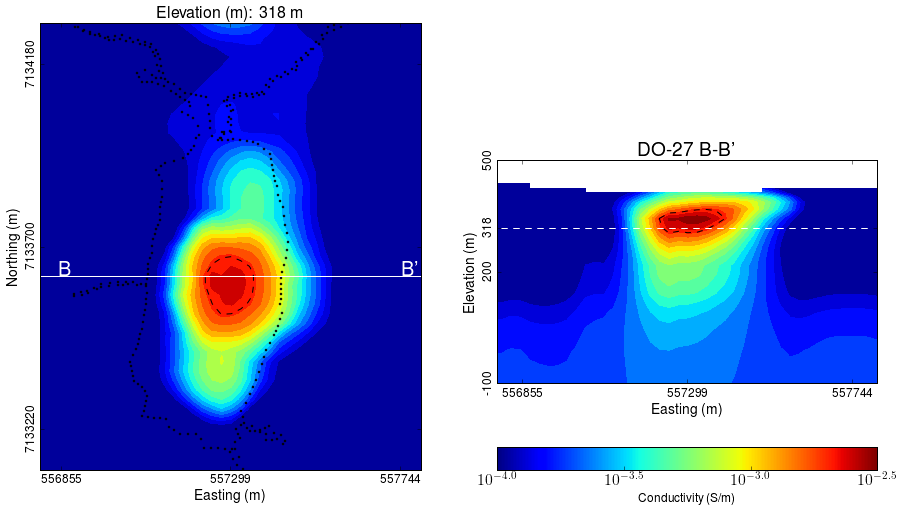

In [95]:



vizCond(cond_m1, None,levels=[2e-3], indz = 13, indy1 = 20,  vmin = -4.0, vmax = -2.5, savefig=True, figname = directory + outfile)



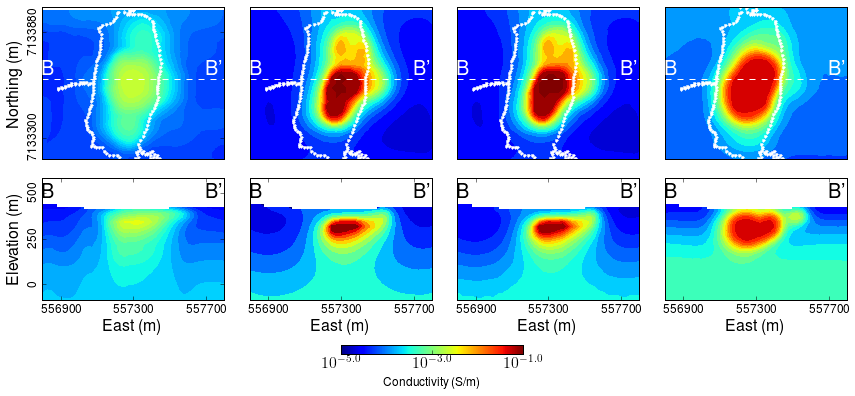

In [118]:
directory = "C:\\Users\\dominiquef.MIRAGEOSCIENCE\\Dropbox\\EOSC 556b (2013) EM\\TKC_Project\\Models\FinalCommon\\"
mesh = Mesh.TensorMesh.readUBC(directory+"TKC_common_mesh.mesh")
sigma_0= mesh.readModelUBC(directory+'sigma_DIGHEM_1D.con')
sigma_1 = mesh.readModelUBC(directory+'sigma_DIGHEM_3D.con')
sigma_2 = mesh.readModelUBC(directory+'sigma_coop_tensor_dighem_tkc_common.con')
sigma_3 = mesh.readModelUBC(directory+'sigma_coop_tensor_vtem_tkc_common.con')

lake = np.loadtxt(directory+'Lake_trace.dat')
    
    
airind = sigma_0==1e-8
active = ~airind.copy()
sigma_0[mesh.gridCC[:,1]> 1000+7.133e6] = np.nan
sigma_1[mesh.gridCC[:,1]> 1000+7.133e6] = np.nan
sigma_2[mesh.gridCC[:,1]> 1000+7.133e6] = np.nan
sigma_0[airind] = np.nan
sigma_1[airind] = np.nan
sigma_2[airind] = np.nan
sigma_3[airind] = np.nan

indz = 13
indy1 = 20
indy2 = int(np.argmin(abs(mesh.vectorCCy - 7.13359000e+06)))
vmin = -5.
vmax = -1.
title = ["Parametric", "VTEM", "DIGHEM",  "Cooperative"]
figname = "Cond_models_panel.png"
fig, ax = plt.subplots(2,4, figsize = (15,6))
xmin, xmax = 556800, 557800
ymin, ymax = 7133200, 7134000 
zmin, zmax = 0, 500
X, Z = mesh.gridCC[:,0].reshape(mesh.vnC, order="F"), mesh.gridCC[:,2].reshape(mesh.vnC, order="F")    
Y = mesh.gridCC[:,1].reshape(mesh.vnC, order="F")


# First model
temp = np.log10(sigma_0)
temp[~active] = np.nan
temp = temp.reshape(mesh.vnC, order='F')
ptemp = temp[:,:,indz].T
ptemp = ma.array(ptemp ,mask=np.isnan(ptemp))
#dat1 = mesh.plotSlice(temp, normal='Z', ind=indz, ax=ax1, grid=True, gridOpts={'alpha':0.0, 'color':'w'}, clim=(vmin, vmax))
ax[0,0].contourf(X[:,:,indz].T,Y[:,:,indz].T,ptemp,20,vmin=vmin, vmax=vmax)
ptemp = temp[:,indy1,:].T
ax[1,0].contourf(X[:,indy1,:].T,Z[:,indy1,:].T,ptemp,20,vmin=vmin, vmax=vmax,edgecolor="none")

# Second model
temp = np.log10(sigma_1)
temp[~active] = np.nan
temp = temp.reshape(mesh.vnC, order='F')
ptemp = temp[:,:,indz].T
ptemp = ma.array(ptemp ,mask=np.isnan(ptemp))
#dat1 = mesh.plotSlice(temp, normal='Z', ind=indz, ax=ax1, grid=True, gridOpts={'alpha':0.0, 'color':'w'}, clim=(vmin, vmax))
dat1 = ax[0,1].contourf(X[:,:,indz].T,Y[:,:,indz].T,ptemp,20,vmin=vmin, vmax=vmax)
ptemp = temp[:,indy1,:].T
ax[1,1].contourf(X[:,indy1,:].T,Z[:,indy1,:].T,ptemp,20,vmin=vmin, vmax=vmax,edgecolor="none")

# Third model
temp = np.log10(sigma_2)
temp[~active] = np.nan
temp = temp.reshape(mesh.vnC, order='F')
ptemp = temp[:,:,indz].T
ptemp = ma.array(ptemp ,mask=np.isnan(ptemp))
#dat1 = mesh.plotSlice(temp, normal='Z', ind=indz, ax=ax1, grid=True, gridOpts={'alpha':0.0, 'color':'w'}, clim=(vmin, vmax))
ax[0,2].contourf(X[:,:,indz].T,Y[:,:,indz].T,ptemp,20,vmin=vmin, vmax=vmax)
ptemp = temp[:,indy1,:].T
ax[1,2].contourf(X[:,indy1,:].T,Z[:,indy1,:].T,ptemp,20,vmin=vmin, vmax=vmax,edgecolor="none")

# Fourth model
temp = np.log10(sigma_3)
temp[~active] = np.nan
temp = temp.reshape(mesh.vnC, order='F')
ptemp = temp[:,:,indz].T
ptemp = ma.array(ptemp ,mask=np.isnan(ptemp))
#dat1 = mesh.plotSlice(temp, normal='Z', ind=indz, ax=ax1, grid=True, gridOpts={'alpha':0.0, 'color':'w'}, clim=(vmin, vmax))
ax[0,3].contourf(X[:,:,indz].T,Y[:,:,indz].T,ptemp,20,vmin=vmin, vmax=vmax)
ptemp = temp[:,indy1,:].T
ax[1,3].contourf(X[:,indy1,:].T,Z[:,indy1,:].T,ptemp,20,vmin=vmin, vmax=vmax,edgecolor="none")

#mesh.plotSlice(np.log10(sigma_0), ind=indz, ax=ax[0,0], clim=(vmin, vmax), grid=False, gridOpts={"alpha":0.2})
# dat1=mesh.plotSlice(np.log10(sigma_1), ind=indz, ax=ax[0,1], clim=(vmin, vmax), grid=False, gridOpts={"alpha":0.2})
# mesh.plotSlice(np.log10(sigma_2), ind=indz, ax=ax[0,2], clim=(vmin, vmax), grid=False, gridOpts={"alpha":0.2})
# mesh.plotSlice(np.log10(sigma_3), ind=indz, ax=ax[0,3], clim=(vmin, vmax), grid=False, gridOpts={"alpha":0.2})

# mesh.plotSlice(np.log10(sigma_0), normal = 'Y', ind=indy1, ax=ax[1,0], clim=(vmin, vmax), grid=False, gridOpts={"alpha":0.2})
# mesh.plotSlice(np.log10(sigma_1), normal = 'Y', ind=indy1, ax=ax[1,1], clim=(vmin, vmax), grid=False, gridOpts={"alpha":0.2})
# mesh.plotSlice(np.log10(sigma_2), normal = 'Y', ind=indy1, ax=ax[1,2], clim=(vmin, vmax), grid=False, gridOpts={"alpha":0.2})
# dat2 = mesh.plotSlice(np.log10(sigma_3), normal = 'Y', ind=indy1, ax=ax[1,3], clim=(vmin, vmax), grid=False, gridOpts={"alpha":0.2})

for i in range(4):
    pos =  ax[0,i].get_position() 
    ax[0,i].axis("equal")
    ax[0,i].set_xlim(xmin, xmax)
    ax[0,i].set_ylim(ymin, ymax)
    ax[0,i].set_xlabel(" ", fontsize=22)
#     ax[i].set_xlabel("Easting (m)", fontsize=22)
#     ax[i].set_title(title[i], fontsize=22)
    ax[0,i].set_title("", fontsize=22)
    ax[0,i].plot(lake[:,0], lake[:,1], 'w.', lw = 2)
    if i==0:
        ax[0,i].set_ylabel("Northing (m)", fontsize=16)
        y = np.linspace(ymin + 100., ymax-120, 2)
        ax[0,i].set_yticks(map(int, y))
        ax[0,i].set_yticklabels(map(str, map(int, y)),size=12,rotation='vertical')
    else:
        ax[0,i].set_ylabel(" ")
        ax[0,i].set_yticks([])
        
    ax[0,i].set_xticks([])
    
    ax[0,i].plot(np.r_[xmin, xmax], np.r_[mesh.vectorCCy[indy1], mesh.vectorCCy[indy1]] ,'w--', lw=1)    
    ax[0,i].text(xmin, mesh.vectorCCy[indy1]+20., "B", fontsize = 20, color="w")
    ax[0,i].text(xmax-100, mesh.vectorCCy[indy1]+20., "B'", fontsize = 20, color="w")
    

    ax[1,i].axis("equal")
    ax[1,i].set_xlim(xmin, xmax)
    ax[1,i].set_ylim(50., 450.)
#     ax[i].set_xlabel("Easting (m)", fontsize=22)
    ax[1,i].set_xlabel("East (m)", fontsize=16)
#     ax[i].set_title(title[i], fontsize=22)
    ax[1,i].set_title(" ", fontsize=20)
    if i==0:
        ax[1,i].set_ylabel("Elevation (m)", fontsize=16)
        y = np.linspace(zmin, zmax, 3)
        ax[1,i].set_yticks(map(int, y))
        ax[1,i].set_yticklabels(map(str, map(int, y)),size=12,rotation='vertical')
    else:
        ax[1,i].set_ylabel(" ")
        ax[1,i].set_yticks([])
        
    ax[1,i].text(xmin, mesh.vectorCCz[-1], "B", fontsize = 20, color="k")
    ax[1,i].text(xmax-100, mesh.vectorCCz[-1], "B'", fontsize = 20, color="k")
#     ax[1,i].plot(np.r_[xmin, xmax], np.r_[mesh.vectorCCz[indz], mesh.vectorCCz[indz]] ,'w--', lw=1)
    x = np.linspace(xmin+100, xmax-100, 3)
    ax[1,i].set_xticks(map(int, x))
    ax[1,i].set_xticklabels(map(str, map(int, x)),size=12)
    
    ax[1,i].set_position([pos.x0-0.01*i, pos.y0-0.3250,  pos.width, pos.height*0.8])
    ax[0,i].set_position([pos.x0-0.01*i, pos.y0,  pos.width, pos.height])
    
pos =  ax[1,-1].get_position() 
# Add a blank plot to generate the colorbar
dat1 = ax[1,-1].scatter(np.linspace(vmin, vmax, 4),np.linspace(vmin, vmax, 4),c=np.linspace(vmin, vmax, 4),vmin=vmin, vmax=vmax)
cbarax = fig.add_axes([pos.x0 - 0.3, pos.y0-.125,  pos.width, pos.height*0.075])  ## the parameters are the specified position you set 
np.linspace(ymin + 100., ymax-120, 2)
cb = fig.colorbar(dat1,cax=cbarax, orientation="horizontal", ax = ax[-1], ticks=np.linspace(vmin, vmax, 3), format="$10^{%.1f}$")
cb.set_label("Conductivity (S/m)",size=12)

fig.savefig(directory + figname)

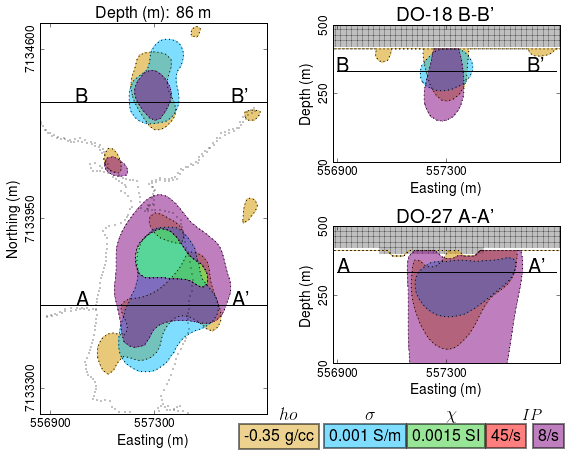

In [15]:
import matplotlib.gridspec as gridspec

directory = "C:\\Users\\dominiquef.MIRAGEOSCIENCE\\ownCloud\\TKCmodels\\modelFigures\\Models\\"
lake = np.loadtxt(directory+'Lake_trace.dat')

plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')

def vizContour(val1, DOI = None, levels=None, indz = 0, indy1 = 0, indy2 = 0, alpha = 1, savefig=False, figname="Conductivity.png", color="crimson"):



    #temp = np.log10(val1)
    #temp[~active] = np.nan
    
      
    #cbarax = fig.add_axes([pos.x0 + 0.01, pos.y0,  pos.width, pos.height*0.025])  ## the parameters are the specified position you set 
    #cb = fig.colorbar(dat1[0],cax=cbarax, orientation="horizontal", ax = ax3, ticks=np.linspace(vmin, vmax, 4), format="$10^{%.1f}$")
    #cb.set_label("Conductivity (S/m)",size=12)
    

        
    TEMP = val1.reshape(mesh.vnC, order="F")    
    X, Z = mesh.gridCC[:,0].reshape(mesh.vnC, order="F"), mesh.gridCC[:,2].reshape(mesh.vnC, order="F")    
    Y = mesh.gridCC[:,1].reshape(mesh.vnC, order="F")

    cont1 = ax1.contourf(X[:,:,indz], Y[:,:,indz], TEMP[:,:,indz], levels=levels,alpha = alpha,colors=color,linewidths = (2,))
    ax1.contour(X[:,:,indz], Y[:,:,indz], TEMP[:,:,indz], levels=levels, colors='k',linestyles='dotted')
    
    cont2 = ax2.contourf(X[:,indy1,:], Z[:,indy1,:], TEMP[:,indy1,:], levels=levels,alpha = alpha,colors=color,linewidths = (2,))
    ax2.contour(X[:,indy1,:], Z[:,indy1,:], TEMP[:,indy1,:], levels=levels, colors='k',linestyles='dotted')
    
    cont3 = ax3.contourf(X[:,indy2,:], Z[:,indy2,:], TEMP[:,indy2,:], levels=levels,alpha = alpha,colors=color,linewidths = (2,))
    ax3.contour(X[:,indy2,:], Z[:,indy2,:], TEMP[:,indy2,:], levels=levels, colors='k',linestyles='dotted')

den_cutoff = -3.5e-1
den_color = "goldenrod"

con_cutoff = 1e-3
con_color = "deepskyblue"

sus_cutoff = 1.5e-3
sus_color = "limegreen"

IP_E_cutoff = 45
IP_E_color = "red"

IP_L_cutoff = 8
IP_L_color = "purple"

mesh = Mesh.TensorMesh.readUBC(directory+"newSubset.msh")
airind = mesh.readModelUBC(directory+'active_cell.dat') == 0
DOI = np.ones(mesh.nC)    
DOI[airind] = 0
DOI = DOI.reshape(mesh.vnC, order='F')
gs = gridspec.GridSpec(1,18)
fig = plt.figure(figsize = (15, 7))
ax1 = plt.subplot(gs[:5])
ax2 = plt.subplot(gs[6:11])
ax3 = plt.subplot(gs[12:17])
indz = 40
indy1 = 37
indy2 = 76
surface = 418.

temp = DOI.reshape(mesh.vnC, order='F')
       
    
dat1 = mesh.plotSlice(temp, normal='Z', ind=indz, ax=ax1,
                      gridOpts={'alpha':0.25, 'color':'w'},pcolorOpts={'cmap':'gray','alpha':0.25},clim=(0, 1))

dat2 = mesh.plotSlice(temp, normal='Y', ind=indy1, ax=ax2,
                      gridOpts={'alpha':0.25, 'color':'w'},pcolorOpts={'cmap':'gray','alpha':0.25},clim=(0, 1))

dat3 = mesh.plotSlice(temp, normal='Y', ind=indy2, ax=ax3,
                      gridOpts={'alpha':0.25, 'color':'w'},pcolorOpts={'cmap':'gray','alpha':0.25},clim=(0, 1))
    


model = mesh.readModelUBC(directory+'ggFinal.den')
vizContour(model, DOI, levels=[-1e+0, den_cutoff], indz = 40, indy1 = 37, indy2 = 76, alpha = 0.6, color=den_color)

model = mesh.readModelUBC(directory+'DIGHEM_3D_Common_LB1em4.con')
vizContour(model, DOI, levels=[con_cutoff, 1e-1], indz = 40, indy1 = 37, indy2 = 76, alpha = 0.5, color=con_color)

model = mesh.readModelUBC(directory+'vtemRem.sus')
vizContour(model, DOI, levels=[7e-3, 1e-1], indz = 40, indy1 = 37, indy2 = 76, alpha = 0.5, color=sus_color)

model = mesh.readModelUBC(directory+'vtemRem.sus')
vizContour(model, DOI, levels=[sus_cutoff, 7e-3], indz = 40, indy1 = 37, indy2 = 76, alpha = 0.5, color="purple")


# model = mesh.readModelUBC(directory+'peta_E.eta')
# vizContour(model, DOI, levels=[IP_E_cutoff, model.max()], indz = 40, indy1 = 37, indy2 = 76, alpha = 0.5, color=IP_E_color)

# model = mesh.readModelUBC(directory+'peta_L.eta')
# vizContour(model, DOI, levels=[IP_L_cutoff, model.max()], indz = 40, indy1 = 37, indy2 = 76, alpha = 0.5, color=IP_L_color)


xmin, xmax = 556900, 557700
ymin, ymax = 7133200, 7134700 
zmin, zmax = 0, 500
ax1.plot(lake[:,0], lake[:,1], 'k.', ms=1)    
ax1.plot(np.linspace(xmin-500, xmax+500, 101), np.ones(101)*mesh.vectorCCy[indy1], 'k-', lw = 1)
ax1.text(xmin+100., mesh.vectorCCy[indy1], 'A',fontsize =20, color="k")
ax1.text(xmax-100, mesh.vectorCCy[indy1], ("A'") ,fontsize =20, color="k")
ax1.plot(np.linspace(xmin-500, xmax+500, 101), np.ones(101)*mesh.vectorCCy[indy2], 'k-', lw = 1)
ax1.text(xmin+100., mesh.vectorCCy[indy2], 'B',fontsize =20, color="k")
ax1.text(xmax-100, mesh.vectorCCy[indy2], ("B'") ,fontsize =20, color="k")

ax1.set_title('Depth (m):   ' + str(int(surface-mesh.vectorCCz[indz]))+' m',size=16)
ax1.set_xlabel('Easting (m)',size=14)
ax1.set_ylabel('Northing (m)',size=14)

ax2.text(xmin, mesh.vectorCCz[indz], "A", fontsize = 20, color="k")
ax2.text(xmax-100, mesh.vectorCCz[indz], "A'", fontsize = 20, color="k")
ax2.plot(np.r_[xmin, xmax], np.r_[mesh.vectorCCz[indz], mesh.vectorCCz[indz]] ,'k-', lw=1)
ax2.set_xlabel('Easting (m)',size=14)
ax2.set_ylabel('Depth (m)',size=14)
ax2.set_title("DO-27 A-A'")
              
ax3.text(xmin, mesh.vectorCCz[indz], "B", fontsize = 20, color="k")
ax3.text(xmax-100, mesh.vectorCCz[indz], "B'", fontsize = 20, color="k")
ax3.plot(np.r_[xmin, xmax], np.r_[mesh.vectorCCz[indz], mesh.vectorCCz[indz]] ,'k-', lw=1)
ax3.set_xlabel('Easting (m)',size=14)
ax3.set_ylabel('Depth (m)',size=14)
ax3.set_title("DO-18 B-B'")

#x = np.linspace(xmin*1.0001, xmax*0.9999, 3)
x = np.asarray([556900, 557300])
ax1.set_xticks(map(int, x))
ax1.set_xticklabels(map(str, map(int, x)),size=12)
ax2.set_xticks(map(int, x))
ax2.set_xticklabels(map(str, map(int, x)),size=12)
ax3.set_xticks(map(int, x))
ax3.set_xticklabels(map(str, map(int, x)),size=12)

#y = np.linspace(ymin*1.000025, ymax*.999975, 3)
y = np.asarray([7133300, 7133950, 7134600])
ax1.set_yticks(map(int, y))
ax1.set_yticklabels(map(str, map(int, y)),size=12,rotation='vertical')

y = np.linspace(zmin, zmax, 3)
ax2.set_yticks(map(int, y))
ax2.set_yticklabels(map(str, map(int, y)),size=12,rotation='vertical')
ax3.set_yticks(map(int, y))
ax3.set_yticklabels(map(str, map(int, y)),size=12,rotation='vertical')
ax2.axis("equal")
ax3.axis("equal")
ax1.axis("equal")
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(zmin,zmax)
ax3.set_xlim(xmin, xmax)
ax3.set_ylim(zmin,zmax)

pos =  ax2.get_position() 
ax2.set_position([pos.x0 + 0.01, pos.y0+0.1,  pos.width, pos.height*.35])
ax3.set_position([pos.x0 + 0.01, pos.y0+.5,  pos.width, pos.height*.35])

pos =  ax2.get_position() 
#cbarax = fig.add_axes([pos.x0, pos.y0-0.2,  pos.width, pos.height]) 

ax2.text(pos.x0-0.05, pos.y0-0.11, "$$\rho$$",size = 18, transform=fig.transFigure)
mrk_props = dict(boxstyle="square,pad=0.3",fc=den_color, ec="k", lw=2, alpha = 0.5)     
ax2.text(pos.x0-0.05, pos.y0-0.145, str(den_cutoff) + " g/cc", transform=fig.transFigure, ha="center", va="center",
            size=16,
            bbox=mrk_props)  

ax2.text(pos.x0+0.03, pos.y0-0.11, "$\sigma$",size = 18, transform=fig.transFigure)
mrk_props = dict(boxstyle="square,pad=0.3",fc=con_color, ec="k", lw=2, alpha = 0.5)     
ax2.text(pos.x0+0.03, pos.y0-0.145, str(con_cutoff) + " S/m", transform=fig.transFigure, ha="center", va="center",
            size=16,
            bbox=mrk_props) 

ax2.text(pos.x0+0.105, pos.y0-0.11, "$\chi$",size = 18, transform=fig.transFigure)
mrk_props = dict(boxstyle="square,pad=0.3",fc=sus_color, ec="k", lw=2, alpha = 0.5)     
ax2.text(pos.x0+0.105, pos.y0-0.145, str(sus_cutoff) + " SI", transform=fig.transFigure, ha="center", va="center",
            size=16,
            bbox=mrk_props) 

ax2.text(pos.x0+0.175, pos.y0-0.11, "$IP$",size = 16, transform=fig.transFigure)
mrk_props = dict(boxstyle="square,pad=0.3",fc=IP_E_color, ec="k", lw=2, alpha = 0.5)     
ax2.text(pos.x0+0.16, pos.y0-0.145, str(IP_E_cutoff) + "/s", transform=fig.transFigure, ha="center", va="center",
            size=16,
            bbox=mrk_props) 
 
mrk_props = dict(boxstyle="square,pad=0.3",fc=IP_L_color, ec="k", lw=2, alpha = 0.5)  
ax2.text(pos.x0+0.20, pos.y0-0.145, str(IP_L_cutoff) + "/s", transform=fig.transFigure, ha="center", va="center",
            size=16,
            bbox=mrk_props) 
    
#my_cmap = matplotlib.colors.ListedColormap(["limegreen","deepskyblue","goldenrod"])
#heatmap = cbarax.pcolor(np.random.rand(4, 4), cmap=my_cmap)

#cb = fig.colorbar(heatmap, ax = cbarax, orientation="horizontal", ticks=[0, .5, 1.])
#cb.set_label("Petrophysical model",size=12)
#cb.ax.set_xticklabels(['Low', 'Medium', 'High'])

fig.savefig(directory+"Petrophysic_model_DenCondSuscIP.jpg")

In [242]:
import matplotlib.gridspec as gridspec
from matplotlib.path import Path
import matplotlib.patches as patches
def vizCondGeo(val1, geo,ccodes, DOI = None, levels=None, indz = 0, indy1 = 0, vmin=-4, vmax=-1,savefig=False, figname="Conductivity.png"):
    #indz = 13
    #indy1 = 54
    #indy2 = int(np.argmin(abs(mesh.vectorCCy - 7.13359000e+06)))

    #print mesh.vectorCCz[indz]
    #print mesh.vectorCCy[indy2]
    #print mesh.vectorCCy[indy1]    
    #print vmin, vmax
    
    # xlim 556800 to 557800
# ylim 7133200 to 7134700
    xmin, xmax = 557100, 557575
    ymin, ymax = 7133200, 7134200 
    zmin, zmax = 230, 440
    surface = 418.
    X, Z = mesh.gridCC[:,0].reshape(mesh.vnC, order="F"), mesh.gridCC[:,2].reshape(mesh.vnC, order="F")    
    Y = mesh.gridCC[:,1].reshape(mesh.vnC, order="F")
    temp = np.log10(val1)
    temp[temp<-5] = -5
    temp[~active] = np.nan
    temp = temp.reshape(mesh.vnC, order='F')
    
    #global ax1, ax2, ax3, fig
    fig = plt.figure(figsize = (13, 10))
    ax2 = plt.subplot(1,1,1, aspect='equal')
    
    ptemp = temp[:,indy1,:].T
    ptemp = ma.array(ptemp ,mask=np.isnan(ptemp))
    #dat1 = mesh.plotSlice(temp, normal='Z', ind=indz, ax=ax1, grid=True, gridOpts={'alpha':0.0, 'color':'w'}, clim=(vmin, vmax))
    dat1 = plt.contourf(X[:,indy1,:].T,Z[:,indy1,:].T,ptemp,20,vmin=vmin, vmax=vmax)

    ax2.set_title("DO-27 ( A - A' )",size=16)
    ax2.set_xlabel('Easting (m)',size=14)
    ax2.set_ylabel('Depth (m)',size=14)
    
    
    #x = np.linspace(xmin*1.0001, xmax*0.9999, 3)
    #ax2.set_xticks(map(int, x))
    #ax2.set_xticklabels(map(str, map(int, x)),size=12)

    
    #y = np.linspace(zmin, zmax, 3)
    #ax2.set_yticks(map(int, y))
    #ax2.set_yticklabels(map(str, map(int, y)),size=12,rotation='vertical')
    #ax2.axis("equal")

    ax2.set_xlim(xmin, xmax)
    ax2.set_ylim(zmin,zmax)
    
    pos =  ax2.get_position() 
    ax2.set_position([pos.x0 , pos.y0+0.15,  pos.width, pos.height*.5])
    
    
    cbarax = fig.add_axes([pos.x0+0.775 , pos.y0+.175,  pos.width*0.05, pos.height*0.4])  ## the parameters are the specified position you set 
    cb = fig.colorbar(dat1,cax=cbarax, ax = ax2, ticks=np.linspace(vmin, vmax, 4), format="$10^{%.1f}$")
    cb.set_label("Conductivity (S/m)",size=12)
    
    if levels is not None:
        
        TEMP = val1.reshape(mesh.vnC, order="F")    
        X, Z = mesh.gridCC[:,0].reshape(mesh.vnC, order="F"), mesh.gridCC[:,2].reshape(mesh.vnC, order="F")    
        Y = mesh.gridCC[:,1].reshape(mesh.vnC, order="F")

        #cs = ax1.contour(X[:,:,indz], Y[:,:,indz], TEMP[:,:,indz], levels=levels,colors="crimson",linewidths = (2,))
        cs = ax2.contour(X[:,indy1,:], Z[:,indy1,:], TEMP[:,indy1,:], levels=levels,colors='k',linewidths = (1,),linestyles='dashed')
        plt.clabel(cs, inline=1, fontsize=14)

            
    for ii in range (len(geo)):
        
        # ADD GEOLOGY
        nverts = geo[ii].shape[0]
        codes = np.ones(nverts, int) * Path.LINETO
        codes[0] = Path.MOVETO
        

        path = Path(geo[ii][:,0::2], codes)

        patch = patches.PathPatch(path, facecolor=ccodes[ii], edgecolor='k',alpha=0.6, lw=1)
        ax2.add_patch(patch)

    #ax2.text(557450, 265, 'HK', color='k', size=20)
    #ax2.text(557450, 320, 'VK', color='k', size=20)
    #ax2.text(557180, 350, 'PK', color='k', size=20)
    ax2.text(557180, 390, 'Till', color='k', size=20)
    ax2.text(557180, 422, 'Lake', color='k', size=20)
#     ax1.text(x2+100., y2-50., 'A2', color= 'w', fontsize=16)
#     ax1.text(x3+200, y3, 'A1', color= 'w', fontsize=16)        
#     ax2.text(x3+100, z3-150, 'A1', color= 'w', fontsize=16)        
#     ax3.text(x1-200, z1-150, 'A3', color= 'w', fontsize=16)            
#     ax3.text(x2+100, z2-50, 'A2', color= 'w', fontsize=16) 
    
    if savefig:
        fig.savefig(figname)

    
    

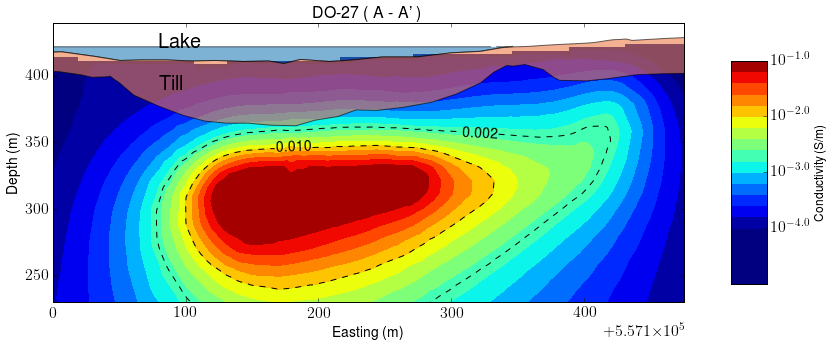

In [243]:
directory = "C:\\Users\\dominiquef.MIRAGEOSCIENCE\\Google Drive\\Tli_Kwi_Cho\\Modelling\\DO27_Section2008_obj\\"

#directory = "C:\\Users\\dominiquef.MIRAGEOSCIENCE\\Google Drive\\Tli_Kwi_Cho\\Modelling\\Inversion\\EM\\DIGHEM\\3D\\Real_topo\\Inv9_FixBeta_1DRef"
mesh = Mesh.TensorMesh.readUBC(directory + "DO27_2p5m_Section.msh")
cond_m1 = mesh.readModelUBC(directory + 'DIGHEM_Section_2p5m.con')
geo = []


geo.append(np.genfromtxt(directory + 'Lake.dat',delimiter=' '))
geo.append(np.genfromtxt(directory + 'Till.dat',delimiter=' '))
#geo.append(np.genfromtxt(directory + 'KIMB1.dat',delimiter=' '))
#geo.append(np.genfromtxt(directory + 'KIMB3.dat',delimiter=' '))
#geo.append(np.genfromtxt(directory + 'KIMB2a.dat',delimiter=' '))

ccodes = ['#2980b9','#ed7e4a','none','none','none']

outfile = 'DO27_Section.png'
airind = cond_m1==1e-8
active = ~airind.copy()

vizCondGeo(cond_m1, geo, ccodes, levels=[1e-2, 2e-3], indz = 0, indy1 = 0,  vmin = -4.0, vmax = -1., savefig=True, figname = directory + outfile)



In [19]:
directory

'C:\\Users\\dominiquef.MIRAGEOSCIENCE\\Google Drive\\Tli_Kwi_Cho\\Modelling\\DO27_Section2008_obj\\'

In [28]:
Path.

array([  5.57515229e+05,   3.93669556e+02])